
# Центральная предельная теорема и гамма-распределение

## 1. Начальные данные

## 1.0 Пример из жизни
Говоря о ___гамма-распределении__, для наглядности, рассмотрим следующую ситуацию:

Однажды, спустившись в метро, Вы обнаруживаете очередь перед турникетами. Оказывается, сотрудники полиции 
проверяют у всех пассажиров наличие пропуска и документа, удостоверяющего личность. Вы торопитесь на важную встречу.
Поскольку Вы из дома вышли заранее, в запасе (с учетом дороги) есть 7 минут, чтобы успеть к месту встречи вовремя.
На проверку документов одного пассажира у сотрудников правопорядка уходит, в среднем, 2 минуты. Вы - четвертый в очереди.
Какова вероятность, что Вы не опоздаете на встречу?  

Для решения данной задачи воспользуемся  ___гамма-распределением___.

### 1.1 Подробнее о гамма-распределении
Известно, что _гамма-распределение_ наиболее хорошо подходит для прогнозирования времени ожидания будущих событий.
В отличии от экспоненциального распределения, которое предсказывает время ожидания ближайшего события, 
_гамма-распределение_ описывает аероятность появления $k$-го события, т.е. распределение суммы независимых 
случайных величин, каждая из которых распределена по экспоненциальному закону.

Кроме того, _гамма-распределение_ является обобщением рапсределения _хи-квадрат_ , распределения _Эрланга_ и, соответственно, _экспоненциального распределения_.

### 1.2 Плотность гамма-распределения

Область определения _гамма-распределения_ — натуральные неотрицательные числа.

_Гамма-распределение_ является двухпараметрическим и определяется неотрицательными параметрами: 
- $k>0$  — число ожидаемых событий (___shape___) 
- $\theta>0$ — среднее время ожидания между соседними событиями (___scale___).

$$ G_{k,\theta}(t)=t^{k-1}{e^{-{t \over \theta}}\over \Gamma(k) \theta^k} \ \ \ \ \ \ (1.0) $$

$$где \ t \ge 0,\  \ \Gamma (k) = (k - 1)! \ \  — \ гамма-функция \ Эйлера.$$

При целом значении степеней свободы $k$, ___гамма-распределение___ называется ___распределением Эрланга___.


Также можно встретить такую формулу для плотности _гамма_ распределения:

- $\alpha>0$  — число ожидаемых событий (___shape___) 
- $\beta>0$ — "скорость" событий (___rate___)

$$ G_{\alpha,\beta}(t)={{\beta^\alpha} \over \Gamma(\alpha)}t^{\alpha - 1}e^{-{\beta t}} \ \ \  \ \ \ \ (1.1) $$

$$ где \ \ t \ge 0,\ \ \Gamma (\alpha) = (\alpha - 1)! \ \  — \ гамма-функция \ Эйлера.$$

Очевидно, $\  k = \alpha \ $ и $\ \beta = {1 \over {\theta}}$. 

### 1.3 Свойства гамма-распределения
Матожидание:  $$\  E\{G_{k,\theta}\}=k\theta\ \ \ (1.2)$$  или другая запись для (1.1)
$$\  E\{G_{\alpha,\beta}\}={\alpha \over \beta}\ \ \ (1.2.1)$$   
Дисперсия: $$\  D\{G_{k,\theta}\}=k\theta^2\ \ \ (1.3)$$   или другая запись  для (1.1)$$\  D\{G_{\alpha,\beta}\}={\alpha \over \beta^2}\ \ \ (1.3.1)$$  

Теперь у нас есть вся необходимая инофрмация про _гамма-распределение_.

### 1.4 Нормальное распределение

Формула _нормального распределения_ , которую будем использовать в наших вычислениях:

$$ {f(x)=}{{1} \over {\sqrt {2\pi  \sigma ^{2} }}}\ {e^ {(x-\mu)^{2} \over {2\sigma ^{2}}}}  \ \ \ \ \ \ (1.4) $$

## 2 Постановка задач
1. Сгенерируем из _гамма-распределения_ выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины
2. Оценим распределение выборочного среднего случайной величины _гамма-распределения_ при разных объёмах выборок.
    - При трёх и более значениях _n_ (5, 10, 50, 100, 150, 300, 500, 700) сгенерируем 1000 выборок объёма n
    - Построим гистограммы распределений их выборочных средних
    - Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения
3.  Посчитаем значения параметров нормальных распределений, которыми приближается распределение выборочных средних
4. Оценим разницу между полученными распределениями при различных значениях _n_.

## 3. Подготовка

### 3.1 Импортируем необходимые библиотеки.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math


### 3.2 Функции
Для решения задач п.2.0 напишем несколько фукций.

#### 3.2.1 Функция гамма-распределения, для вычисления по формуле (1.0)  
Параметры:  
___x___   - аргумент  
___shape\____ - число ожидаемых событий  
___scale\____ - среднее время ожидания между соседними событиями

In [15]:
def gamma_pdf(x, shape_, scale_):
    return (np.power(x, shape_ - 1) * np.power(np.e, (-x / scale_))) / (math.factorial(shape_ - 1) * np.power(scale_, shape_))

#### 3.2.2 Функция-генератор средних значений гамма-распределения
Параметры:  
___num___     - количество генерируемых выборок (по условиям задачи num = 1000)  
___total___   - объем выборки для определения выборочного среднего  
___shape\____ - число ожидаемых событий  
___scale\____ - среднее время ожидания между соседними событиями

In [16]:
def get_mean_gamma(num, total, shape_, scale_):
    _ = np.random.gamma(shape=shape_, scale=scale_, size=(num, total))
    return np.mean(_, axis = 1)


#### 3.2.3 Функция отрисовки графиков
Параметры:  
n - объем выборочного среднего  
x - список выборочных средних, объема 1000
y - список значений нормального распределения, приближающих распределение выборочных средних
d - мат. ожидание  
e - дисперсия

In [17]:
def graph_hist_pdf(n, x, y, d, e):
    fig, axes = plt.subplots(figsize=(8,4), dpi=80)
    plt.hist(x, bins = 'auto', label="Гист. выборки\nсредних - " + str(n), color='green', density = True)
    plt.plot(x, y, label="Теор. плотность\nнорм. распр-ия", color = 'red')
    plt.xlabel("Время")
    plt.ylabel("Плотность вероятности")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=12)


#### 3.2.4 Функция нормального распределения, приближающая распределение выборочных средних
Параметры:
x - список выборочных средних, объема 1000
e - математическое ожидание (мю из формулы 1.4)  
d - дисперсия (сигма^2 из формулы 1.4)

In [18]:
def gauss_pdf(x, e, d):
    return 1 / ((pow(d * 2 * np.pi, .5)) * pow(np.e, pow(x - e, 2) / (2 * d)))


#### 3.2.5 Функция пополнения таблицы со значениями характеристик для выборок среднего различного объема
Параметры:  
___df___ - фрейм (таблица), в которую будем заносить _Мат. ожидание_, 
     _Процент отклонения_ от теоретического _Мат. ожидания_,
     _Дисперсию_ и _Стандартное отклонение_ для каждого из объемов для выбора среднего.  
___n___ - объем выборочного среднего  
___m___ - _Мат. ожидание_ для выборки среднего объема _n_  
___disp___ - _Дисперсия_ для выборки среднего объема _n_  
___dev___ - _Квадратичное отклонения_ для выборки среднего объема _n_

In [19]:
def df_add_(df, n, m, disp, dev):
    i = df.index[-1] + 1
    df.loc[i] = [n, m, 100 * m / df['М. ож.'].iloc[0] - 100, disp, dev]
    

#### 3.2.6 Функция формирования таблицы со значениями характеристик для выборок среднего различного объема 
___df___ - фрейм (таблица), в которую будем заносить _Мат. ожидание_, 
     _Процент отклонения_ от теоретического _Мат. ожидания_,
     _Дисперсию_ и _Стандартное отклонение_ для каждого из объемов для выбора среднего.  
___df[0]___ - теоретические значения _Мат. ожидания_, _Дисперсии_ и _Стандартного отклонения_ для рассматриваемого в работе _гамма-распределения_ (1.0) с параметрами $k = 3$ и $\theta = 2$  

Параметры:  
___list___ - список различных объемов для выборок среднего  
___num___ - количество выборок (1000)  
___shape___ - параметр гамма-распределения  
___scale___ - параметр гамма-распределения  

Внутренние переменные:  
___sample___ - список из _num_ (1000) элементов с текущим _el_ из _list_ объемом для выборок среднего


In [20]:
def df_and_graph(list, num, shape, scale):
    df = pd.DataFrame(columns = ['Среднее', 'М. ож.', 'М. ож. (%)', 'Дисп.', 'Ст. откл.'])
    df.loc[0] = [0, shape * scale, '-', shape * pow(scale, 2), math.sqrt(shape * pow(scale, 2))]
    for el in list:
        sample = get_mean_gamma(num, el, shape, scale)
        sample = np.sort(sample)
        m_expect = np.mean(sample)
        disp = np.var(sample)
        dev = np.std(sample)
        y = gauss_pdf(sample, m_expect, disp)
        graph_hist_pdf(el, sample, y, m_expect, disp)
        df_add_(df, el, m_expect, disp, dev)
    return df

## 4. Решение заданий курса

### 4.1 Решение  2 п.1

Сгенерируем значения $z$ _гамма-распределения_ из равномерной выборки $x$ объёма 1000 в диапазоне [0, 30].  
Построим гистограмму выборки $z$ и нарисуем поверх неё теоретическую плотность распределения $y$ нашей случайной величины.

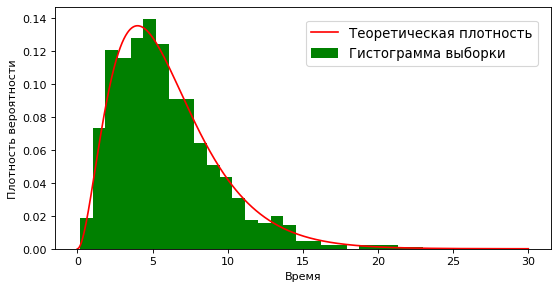

In [21]:
shape = 3
scale = 2
x = np.linspace(0, 30, 1000)
z = get_mean_gamma(1000,1, shape, scale)
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
y = gamma_pdf(x, shape, scale)
plt.plot(x, y, label="Теоретическая плотность", color = 'red')
plt.hist(z, bins = 'auto', label="Гистограмма выборки", color='green', density=True)
plt.xlabel("Время")
plt.ylabel("Плотность вероятности")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right',
               borderaxespad=1, fontsize=12)


Из графика видно, что выборка в соответствии  с законом _гамма-распределения_ случайной величины $z$ (объемом 1000),
хорошо соотносится с теоретической плотностью распределения $y$.

 ### 4.1 Решение  пп.2-3 задания 2
 Оценим распределение выборочного среднего случайной величины при разных объёмах выборок.  
 Для начала, сформируем список _tests_ различных объемов для выборок среднего (2 п.2).  
 Затем, с помощью функций 3.2.1 - 3.2.6 и вывода таблицы со значениями характеристик для выборок среднего различного объема, выполним пп.2-3 задания 2.  

   Среднее   М. ож. М. ож. (%)      Дисп.  Ст. откл.
0        0        6          -         12   3.464102
1        1  5.86635   -2.22756    10.6717   3.266754
2        3  5.98171  -0.304788    4.08511   2.021166
3        5  5.92496   -1.25064    2.36372   1.537441
4       10  6.01045   0.174152    1.21219   1.100997
5       50   5.9991 -0.0149731   0.217378   0.466238
6      100  6.00564  0.0940464   0.122041   0.349344
7      150   5.9944 -0.0933436  0.0838983   0.289652
8      300  5.99665 -0.0557962  0.0407338   0.201826
9      500  6.00128  0.0213264  0.0236322   0.153728
10     700  5.99255  -0.124173  0.0170368   0.130525


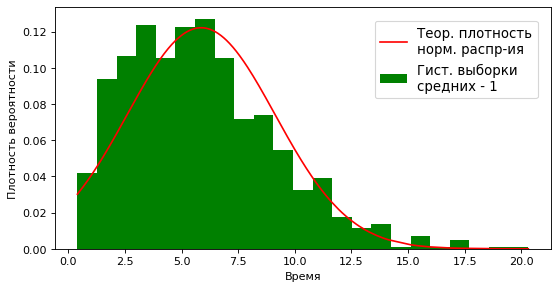

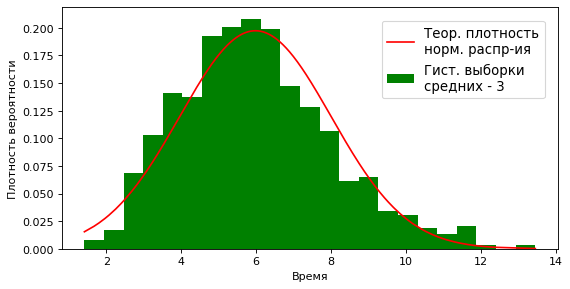

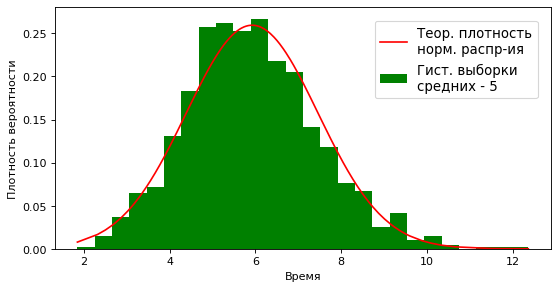

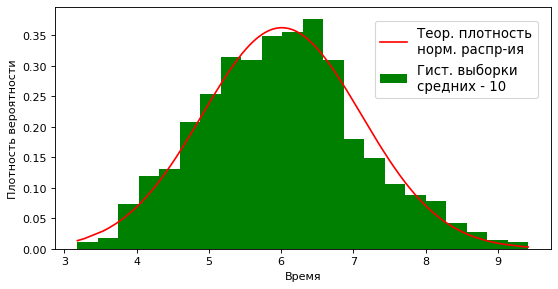

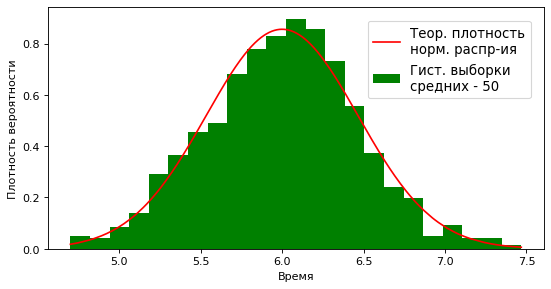

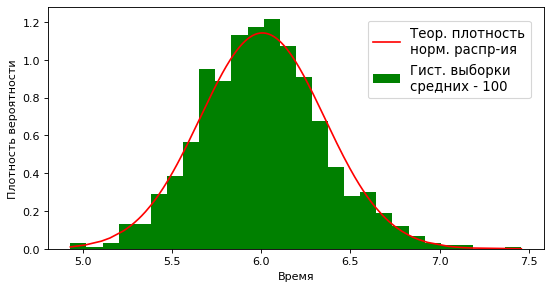

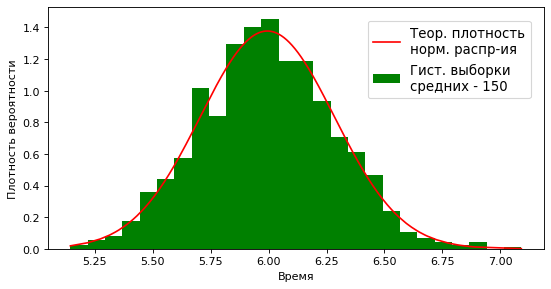

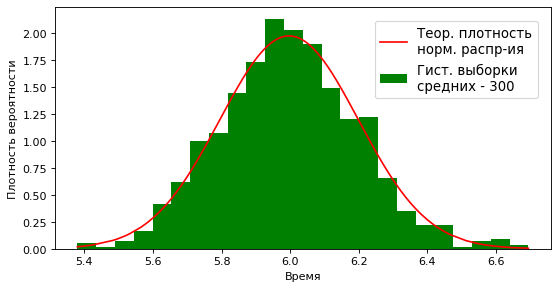

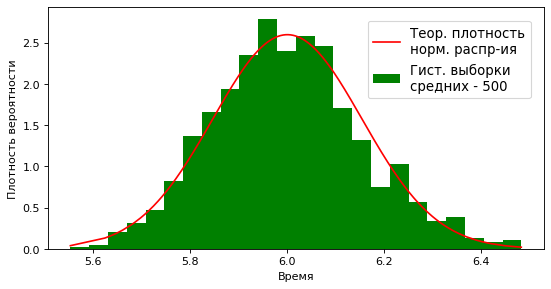

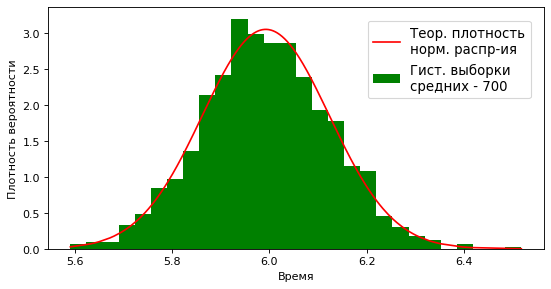

In [22]:

tests = [1, 3, 5, 10, 50, 100, 150, 300, 500, 700]
df = df_and_graph(tests, 1000, 3, 2)
print(df)


 ### 4.2 Решение  пп.4 задания 2
По графикам видно, что с увеличением объема для выбора среднего, распределение приближается к нормальному, происходит "кучкование" величин вокруг выборочного среднего, а выборочное среднее приближается к математическому ожиданию исходного распределения.

Данные таблицы, подтверждают закономерность, замеченную на графиках. С увеличением объема выборки, значения дисперсий и стандартных отклонений снижаются, а процент различия между выборочным средним и математическим ожиданием исходного распределения незначителен.


## 5. P.S.
И, наконец, о задаче, которую поставили в самом начале.

Вероятность того, что придется ждать более 7 минут, равна вероятности, 
что в течении промежутка времени [0, 7], сотрудниками полиции будут обслужены
те, кто стоит впереди по очереди (3 события).Напомним, что один человек обслуживается в среднем в течении 2 минут.

Воспользуемся библиотекой _scipy_ и кумулятивной (интегральной) функцией распределения _cdf(x, a, loc=0, scale=1)_ , которая по параметрам созвучна формуле (1.1): x = 7, a = 3, loc=0, scale=2

Подставляя указанные значения в формулу получаем:


In [23]:
x = round(sts.gamma.cdf(7, 3, 0, 2) * 100, 0)
print("Вероятность ждать более 7 минут и, соответственно, опоздать на встречу, равна ", 100 - x, "процентам.")

Вероятность ждать более 7 минут и, соответственно, опоздать на встречу, равна  32.0 процентам.


Т.е. примерно 2 к 1, что предусмотрительность в 7 минут будет достаточной для того, чтобы оказаться пунктулаьным, несмотря на неожиданную задержку. :-)

